In [32]:
# Importe
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, classification_report

In [45]:
song_data = pd.read_csv('C:\\Users\sdo\Studienarbeit\cleanedData.csv')
song_data

,Artist,Genre,Lyrics,song_text_processed,Text_Length
0,12 stones,Rock,"It starts with pain, followed by hate\nFueled ...",it starts with pain followed by hate\nfueled b...,1606
1,12 stones,Rock,Freedom!\nAlone again again alone\nPatiently w...,freedom\nalone again again alone\npatiently wa...,1181
2,12 stones,Rock,"Biting the hand that feeds you, lying to the v...",biting the hand that feeds you lying to the vo...,742
3,12 stones,Rock,You say you know just who I am\nBut you can't ...,you say you know just who i am\nbut you can't ...,765
4,12 stones,Rock,My heart is beating faster can't control these...,my heart is beating faster can't control these...,1640
...,...,...,...,...,...
227230,bobby womack,R&B,I'm the best friend he's got I'd give him the ...,i'm the best friend he's got i'd give him the ...,1487
227231,bad boys blue,Pop,"Bad Boys Blue ""I Totally Miss You"" I did you w...","bad boys blue ""i totally miss you"" i did you w...",1272
227232,celine dion,Pop,Forgive me for the things That I never said to...,forgive me for the things that i never said to...,1379
227233,dan bern,Indie,The day they found a cure for AIDS The day the...,the day they found a cure for aids the day the...,989


## Häufigste Wörter pro Genre

In [46]:

# Given a list of words, return a dictionary of
# word-frequency pairs.

def wordListToFreqDict(wordlist):
    wordfreq = [wordlist.count(p) for p in wordlist]
    return dict(list(zip(wordlist,wordfreq)))

# Sort a dictionary of word-frequency pairs in
# order of descending frequency.

def sortFreqDict(freqdict):
    aux = [(freqdict[key], key) for key in freqdict]
    aux.sort()
    aux.reverse()
    return aux

stopwords = ['a', 'about', 'above', 'across', 'after', 'afterwards']
stopwords += ['again', 'against', 'all', 'almost', 'alone', 'along']
stopwords += ['already', 'also', 'although', 'always', 'am', 'among']
stopwords += ['amongst', 'amoungst', 'amount', 'an', 'and', 'another']
stopwords += ['any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere']
stopwords += ['are', 'around', 'as', 'at', 'back', 'be', 'became']
stopwords += ['because', 'become', 'becomes', 'becoming', 'been']
stopwords += ['before', 'beforehand', 'behind', 'being', 'below']
stopwords += ['beside', 'besides', 'between', 'beyond', 'bill', 'both']
stopwords += ['bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant']
stopwords += ['co', 'computer', 'con', 'could', 'couldnt', 'cry', 'de']
stopwords += ['describe', 'detail', 'did', 'do', 'done', 'down', 'due']
stopwords += ['during', 'each', 'eg', 'eight', 'either', 'eleven', 'else']
stopwords += ['elsewhere', 'empty', 'enough', 'etc', 'even', 'ever']
stopwords += ['every', 'everyone', 'everything', 'everywhere', 'except']
stopwords += ['few', 'fifteen', 'fifty', 'fill', 'find', 'fire', 'first']
stopwords += ['five', 'for', 'former', 'formerly', 'forty', 'found']
stopwords += ['four', 'from', 'front', 'full', 'further', 'get', 'give']
stopwords += ['go', 'had', 'has', 'hasnt', 'have', 'he', 'hence', 'her']
stopwords += ['here', 'hereafter', 'hereby', 'herein', 'hereupon', 'hers']
stopwords += ['herself', 'him', 'himself', 'his', 'how', 'however']
stopwords += ['hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed']
stopwords += ['interest', 'into', 'is', 'it', 'its', 'itself', 'keep']
stopwords += ['last', 'latter', 'latterly', 'least', 'less', 'ltd', 'made']
stopwords += ['many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine']
stopwords += ['more', 'moreover', 'most', 'mostly', 'move', 'much']
stopwords += ['must', 'my', 'myself', 'name', 'namely', 'neither', 'never']
stopwords += ['nevertheless', 'next', 'nine', 'no', 'nobody', 'none']
stopwords += ['noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of']
stopwords += ['off', 'often', 'on','once', 'one', 'only', 'onto', 'or']
stopwords += ['other', 'others', 'otherwise', 'our', 'ours', 'ourselves']
stopwords += ['out', 'over', 'own', 'part', 'per', 'perhaps', 'please']
stopwords += ['put', 'rather', 're', 's', 'same', 'see', 'seem', 'seemed']
stopwords += ['seeming', 'seems', 'serious', 'several', 'she', 'should']
stopwords += ['show', 'side', 'since', 'sincere', 'six', 'sixty', 'so']
stopwords += ['some', 'somehow', 'someone', 'something', 'sometime']
stopwords += ['sometimes', 'somewhere', 'still', 'such', 'system', 'take']
stopwords += ['ten', 'than', 'that', 'the', 'their', 'them', 'themselves']
stopwords += ['then', 'thence', 'there', 'thereafter', 'thereby']
stopwords += ['therefore', 'therein', 'thereupon', 'these', 'they']
stopwords += ['thick', 'thin', 'third', 'this', 'those', 'though', 'three']
stopwords += ['three', 'through', 'throughout', 'thru', 'thus', 'to']
stopwords += ['together', 'too', 'top', 'toward', 'towards', 'twelve']
stopwords += ['twenty', 'two', 'un', 'under', 'until', 'up', 'upon']
stopwords += ['us', 'very', 'via', 'was', 'we', 'well', 'were', 'what']
stopwords += ['whatever', 'when', 'whence', 'whenever', 'where']
stopwords += ['whereafter', 'whereas', 'whereby', 'wherein', 'whereupon']
stopwords += ['wherever', 'whether', 'which', 'while', 'whither', 'who']
stopwords += ['whoever', 'whole', 'whom', 'whose', 'why', 'will', 'with']
stopwords += ['within', 'without', 'would', 'yet', 'you', 'your']
stopwords += ['yours', 'yourself', 'yourselves',"it's", "i'm","i'll"," "]

def removeStopwords(wordlist, stopwords):
    return [w for w in wordlist if w not in stopwords]

song_data = pd.read_csv('C:\\Users\sdo\Studienarbeit\cleanedData.csv')

song_data['Most_Common_Word_1'] = ""
song_data['Most_Common_Word_2'] = ""
song_data['Most_Common_Word_3'] = ""

song_data = song_data[["Genre","song_text_processed","Most_Common_Word_1","Most_Common_Word_2","Most_Common_Word_3"]]
song_data = song_data.groupby('Genre').sample(300).reset_index(drop=True)

for index in range(3000):  # Annahme: Es gibt mindestens 50 Zeilen
    # Verarbeite jede Zeile
    fullwordlist = song_data["song_text_processed"][index].split()
    wordlist = removeStopwords(fullwordlist, stopwords)
    dictionary = wordListToFreqDict(wordlist)
    sorteddict = sortFreqDict(dictionary)
    
    """
    # Drucke nur die drei häufigsten Wörter aus
    print(f"Zeile {index + 1} - Top 3 Wörter:")
    for freq, word in sorteddict[:3]:  # Nimm die ersten 3 Einträge aus der sortierten Liste
        print(f"{word}: {freq}")
    print("\n")
    """

    for i, (freq, word) in enumerate(sorteddict[:3]):
        song_data.at[index, f'Most_Common_Word_{i+1}'] = word


In [47]:
song_data['Genre'].value_counts()

Genre
Country       300
Electronic    300
Folk          300
Hip-Hop       300
Indie         300
Jazz          300
Metal         300
Pop           300
R&B           300
Rock          300
Name: count, dtype: int64

In [48]:
song_data

,Genre,song_text_processed,Most_Common_Word_1,Most_Common_Word_2,Most_Common_Word_3
0,Country,only you can make my dreams come true only you...,heart,break,turn
1,Country,i saw you walking by her side heard you whispe...,saw,crying,couldn't
2,Country,is yours is mine inside misunderstanding lines...,time,wishing,weather
3,Country,shirts in the closet shoes in the hall mama's ...,you're,missing,walk
4,Country,we're holding on to nothing left to hold onto ...,left,holding,hold
...,...,...,...,...,...
2995,Rock,i've nothing much to offer\nthere's nothing mu...,love,we're,absolutely
2996,Rock,once i had a pretty girl\nher name it doesn't ...,said,larry,turn
2997,Rock,where's the light from yesterday \nwhen you an...,delilah,oh,like
2998,Rock,she´d do anything to sparkle in his eye\nshe w...,rinse,can´t,away


In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

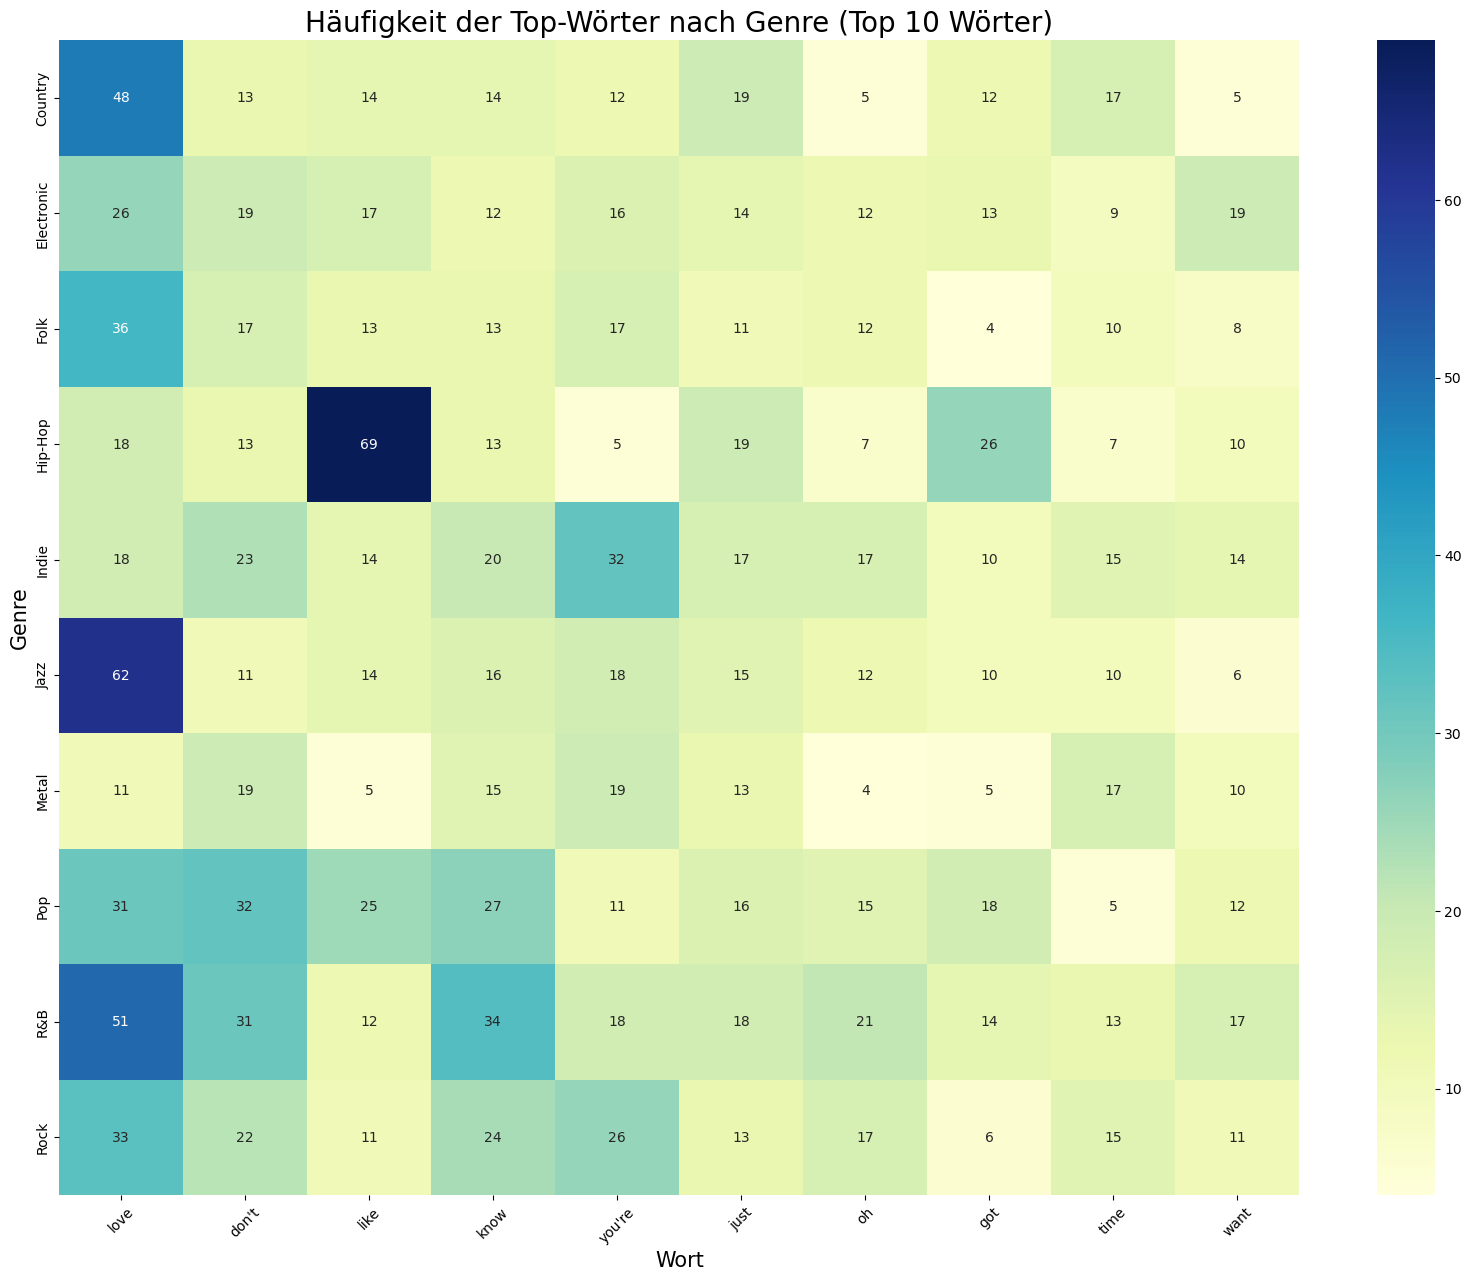

In [50]:
# Angenommen, deine DataFrame heißt df und hat Spalten: 'genre', 'Most_Common_Word_1', 'Most_Common_Word_2', 'Most_Common_Word_3'

# Melte die DataFrame, sodass wir eine lange Form erhalten, mit einer Zeile für jedes Wort-Genre-Paar
melted_song_data = song_data.melt(id_vars=["Genre"], value_vars=["Most_Common_Word_1", "Most_Common_Word_2", "Most_Common_Word_3"], var_name="Common_Word_Rank", value_name="Word")

# Gruppiere nach 'genre' und 'Word', um die Häufigkeit jedes Worts in jedem Genre zu zählen
word_genre_counts = melted_song_data.groupby(["Genre", "Word"]).size().unstack(fill_value=0)

# Visualisiere die resultierende Matrix als Heatmap
top_n = 10  # Anzahl der Top-Wörter, die pro Genre angezeigt werden sollen
top_words = word_genre_counts.sum(axis=0).sort_values(ascending=False).head(top_n).index  # Finde die Top-N-Wörter über alle Genres
filtered_word_genre_counts = word_genre_counts[top_words]  # Filtere die Matrix, um nur diese Wörter anzuzeigen

plt.figure(figsize=(20, 15))
sns.heatmap(filtered_word_genre_counts, annot=True, cmap="YlGnBu", fmt="d", annot_kws={"size": 10})
plt.title('Häufigkeit der Top-Wörter nach Genre (Top ' + str(top_n) + ' Wörter)', fontsize=20)
plt.ylabel('Genre', fontsize=15)
plt.xlabel('Wort', fontsize=15)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()



In [51]:
# Angenommen, word_genre_counts ist der DataFrame, der die Häufigkeit jedes Wortes in jedem Genre zeigt.
# Die Zeilen entsprechen den Genres und die Spalten den Wörtern.

top_10_words_per_genre = {}  # Ein Dictionary, um die Top-10-Wörter für jedes Genre zu speichern

for genre in word_genre_counts.index:
    # Sortiere die Wörter für das aktuelle Genre nach ihrer Häufigkeit in absteigender Reihenfolge
    top_words = word_genre_counts.loc[genre].sort_values(ascending=False).head(10)
    # Speichere die Top-10-Wörter und ihre Häufigkeiten im Dictionary
    top_10_words_per_genre[genre] = top_words

# Optional: Ausgabe der Top-10-Wörter für jedes Genre
for genre, words in top_10_words_per_genre.items():
    print(f"Genre: {genre}")  # Achte darauf, die lokale Schleifenvariable 'genre' hier zu verwenden
    for word, count in words.items():
        print(f"  {word}: {count}")
    print("\n")  # Fügt eine Leerzeile zwischen den Genres ein


Genre: Country
  love: 48
  just: 19
  time: 17
  know: 14
  like: 14
  don't: 13
  got: 12
  you're: 12
  night: 11
  i've: 10


Genre: Electronic
  love: 26
  don't: 19
  want: 19
  like: 17
  you're: 16
  way: 15
  just: 14
  got: 13
  know: 12
  oh: 12


Genre: Folk
  love: 36
  don't: 17
  you're: 17
  know: 13
  like: 13
  oh: 12
  way: 11
  just: 11
  time: 10
  man: 9


Genre: Hip-Hop
  like: 69
  got: 26
  nigga: 25
  just: 19
  love: 18
  ya: 17
  shit: 15
  yo: 13
  don't: 13
  know: 13


Genre: Indie
  you're: 32
  don't: 23
  know: 20
  love: 18
  oh: 17
  just: 17
  time: 15
  want: 14
  like: 14
  think: 12


Genre: Jazz
  love: 62
  you're: 18
  know: 16
  just: 15
  like: 14
  oh: 12
  don't: 11
  way: 11
  time: 10
  got: 10


Genre: Metal
  don't: 19
  you're: 19
  time: 17
  know: 15
  just: 13
  life: 11
  away: 11
  way: 11
  love: 11
  world: 11


Genre: Pop
  don't: 32
  love: 31
  know: 27
  like: 25
  got: 18
  just: 16
  oh: 15
  yeah: 13
  want: 12
  you're:

In [52]:
from collections import Counter
import pandas as pd

# Angenommen, deine DataFrame 'df' hat Spalten: 'genre', 'Most_Common_Word_1', 'Most_Common_Word_2', 'Most_Common_Word_3'
# Hier fügen wir die drei Wortspalten in einem Schritt zusammen; in der Praxis würde man die originalen Songtexte verwenden

# Erstelle eine neue Spalte 'all_words' durch Zusammenfügen der Wörter aus den drei Spalten
song_data['all_words'] = song_data[['Most_Common_Word_1', 'Most_Common_Word_2', 'Most_Common_Word_3']].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

# Gruppiere die DataFrame nach 'genre' und kombiniere alle Wörter eines Genres in einen großen String
genre_words = song_data.groupby('Genre')['all_words'].apply(lambda x: ' '.join(x)).reset_index()

# Initialisiere ein Dictionary, um die Top-10-Wörter für jedes Genre zu speichern
top_10_words_per_genre = {}

for index, row in genre_words.iterrows():
    genre = row['Genre']  # Korrekterweise 'genre' für die Variable
    words = row['all_words'].lower().split()  # Konvertiere in Kleinbuchstaben und teile in Wörter
    words = [word for word in words if word not in stopwords]  # Entferne Stopwörter
    word_counts = Counter(words)  # Zähle die Häufigkeiten der Wörter
    top_10_words = word_counts.most_common(10)  # Wähle die Top-10-Wörter aus
    top_10_words_per_genre[genre] = top_10_words  # Verwende 'genre' als Schlüssel im Dictionary

# Optional: Ausgabe der Top-10-Wörter für jedes Genre
for genre, words in top_10_words_per_genre.items():
    print(f"Genre: {genre}")  # Verwende 'genre' hier für die korrekte Ausgabe
    for word, count in words:
        print(f"  {word}: {count}")
    print("\n")  # Fügt eine Leerzeile zwischen den Genres ein



Genre: Country
  love: 48
  just: 19
  time: 17
  like: 14
  know: 14
  don't: 13
  you're: 12
  got: 12
  night: 11
  say: 10


Genre: Electronic
  love: 26
  want: 19
  don't: 19
  like: 17
  you're: 16
  way: 15
  just: 14
  got: 13
  oh: 12
  know: 12


Genre: Folk
  love: 36
  you're: 17
  don't: 17
  like: 13
  know: 13
  oh: 12
  way: 11
  just: 11
  time: 10
  away: 9


Genre: Hip-Hop
  like: 69
  got: 26
  nigga: 25
  just: 19
  love: 18
  ya: 17
  shit: 15
  yeah: 13
  know: 13
  don't: 13


Genre: Indie
  you're: 32
  don't: 23
  know: 20
  love: 18
  oh: 17
  just: 17
  time: 15
  want: 14
  like: 14
  think: 12


Genre: Jazz
  love: 62
  you're: 18
  know: 16
  just: 15
  like: 14
  oh: 12
  don't: 11
  way: 11
  time: 10
  got: 10


Genre: Metal
  you're: 19
  don't: 19
  time: 17
  know: 15
  just: 13
  love: 11
  away: 11
  life: 11
  way: 11
  world: 11


Genre: Pop
  don't: 32
  love: 31
  know: 27
  like: 25
  got: 18
  just: 16
  oh: 15
  yeah: 13
  want: 12
  you'r

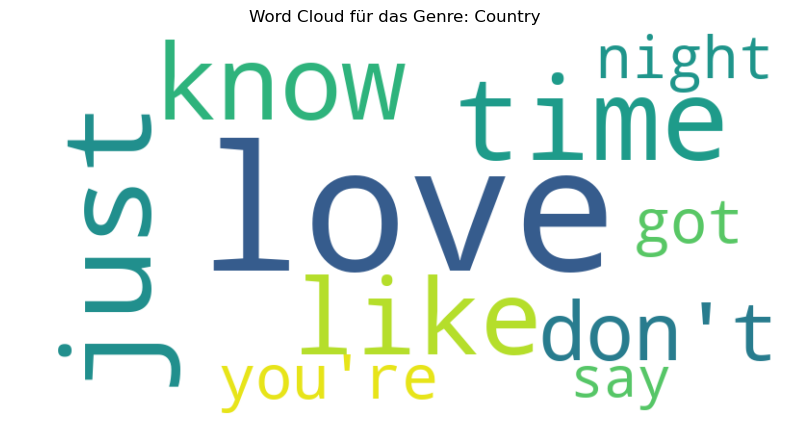

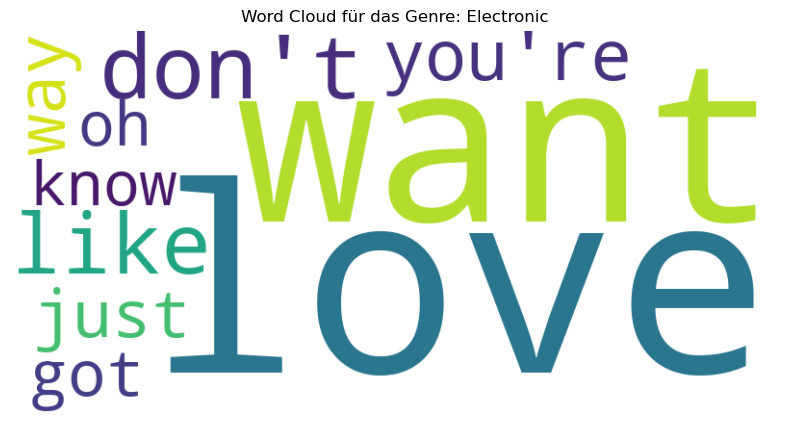

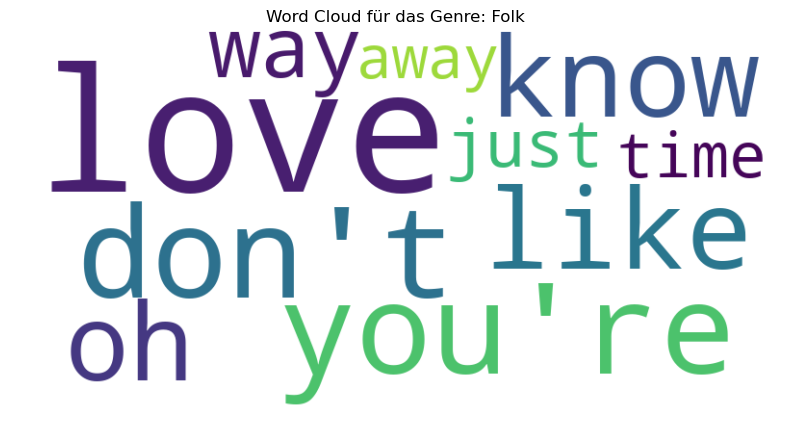

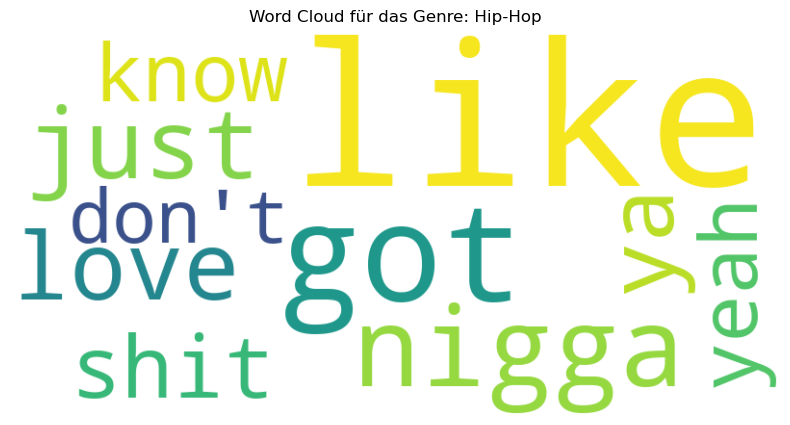

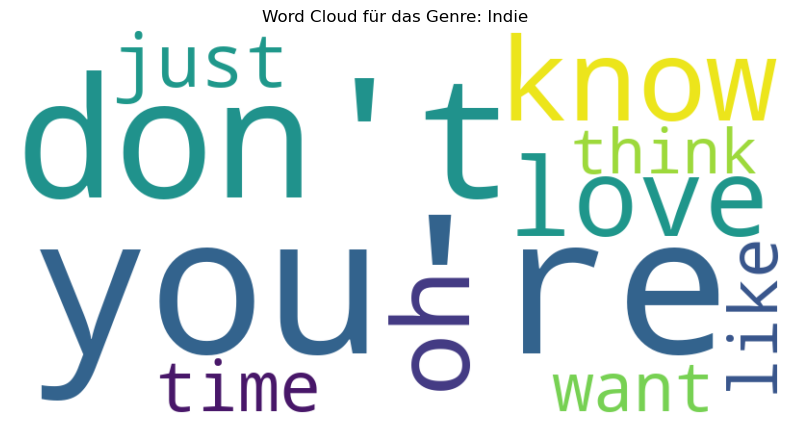

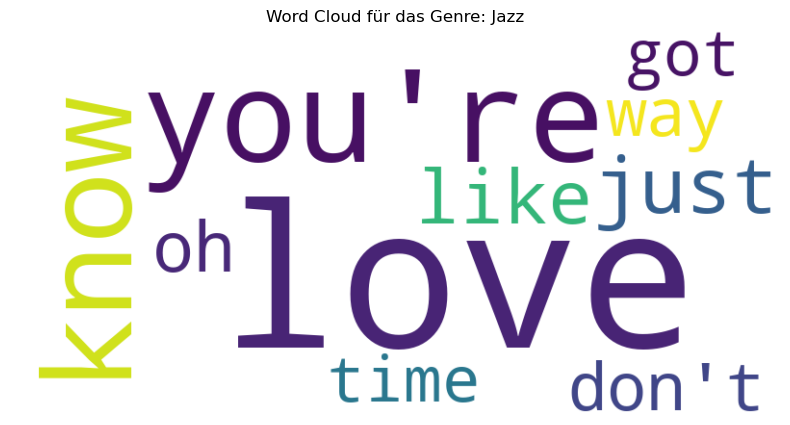

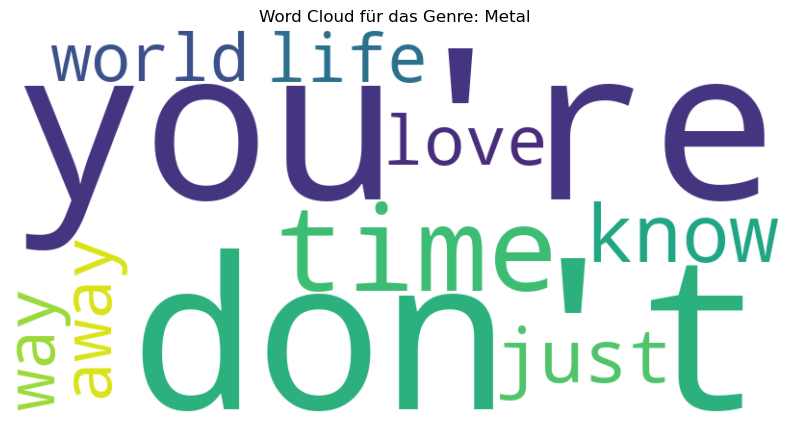

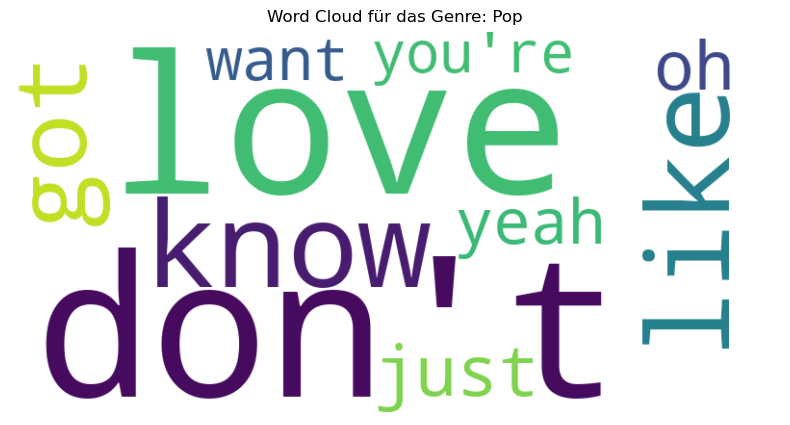

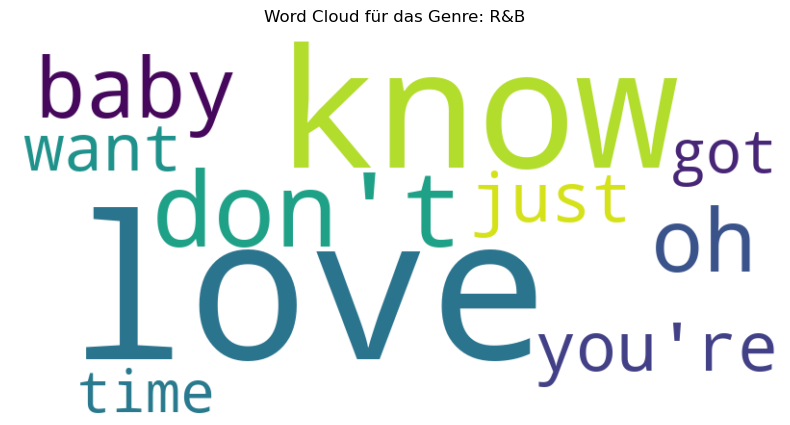

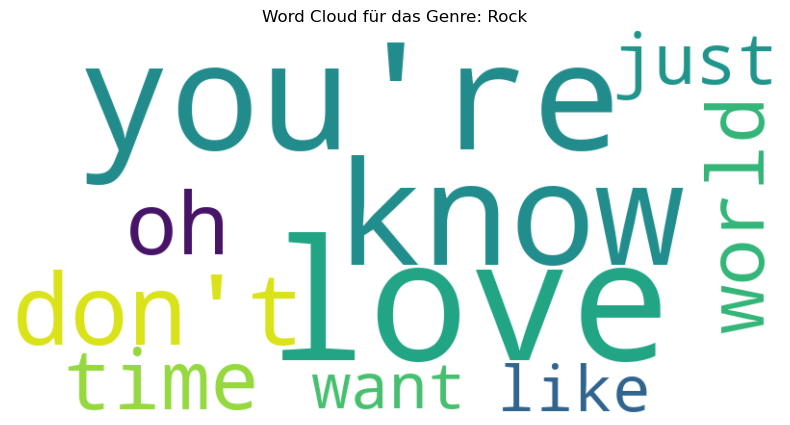

In [53]:
from wordcloud import WordCloud

for genre, frequencies in top_10_words_per_genre.items():
    # Konvertiere die Liste von Tupeln in ein Dictionary
    word_frequencies = dict(frequencies)
    
    # Überprüfe, ob word_frequencies leer ist
    if not word_frequencies:
        print(f"Keine Wörter verfügbar für das Genre: {genre}, überspringe...")
        continue  # Überspringe dieses Genre und fahre mit dem nächsten fort
    
    # Erstelle eine Word Cloud für das aktuelle Genre
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)
    
    # Visualisiere die Word Cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud für das Genre: {genre}")
    plt.show()



## Ausrufe

In [54]:
# Angenommen, song_data ist deine DataFrame und 'all_words' enthält die kombinierten Texte für jedes Genre

# Definiere eine Liste von Ausrufen, die gezählt werden sollen
exclamations = ['oh', 'ah', 'uh', 'wow', 'hey', 'oo', 'okay','kay','ey', 'yeah', 'whoa', 'ooh', 'hey', 'huh', 'mmm', 'yay', 'woo', 'aha', 'uh-huh', 'ohh', 'eh', 'aw', 'alright', 'yo', 'wow', 'no', 'yes', 'hmm']

# Initialisiere ein Dictionary, um die Zählungen für jedes Genre zu speichern
exclamations_per_genre = {}

# Iteriere über jedes Genre in deiner DataFrame
for genre in song_data['Genre'].unique():
    # Extrahiere alle Texte des aktuellen Genres
    genre_texts = song_data[song_data['Genre'] == genre]['all_words'].tolist()
    
    # Zähle die Ausrufe in den Texten des Genres
    exclamation_counts = Counter()
    for text in genre_texts:
        words = text.lower().split()  # Konvertiere in Kleinbuchstaben und teile in Wörter
        for exclamation in exclamations:
            exclamation_counts[exclamation] += words.count(exclamation)
    
    # Speichere die Zählungen im Dictionary
    exclamations_per_genre[genre] = exclamation_counts

# Optional: Ausgabe der Zählungen für jedes Genre
for genre, counts in exclamations_per_genre.items():
    print(f"Genre: {genre}")
    for exclamation, count in counts.items():
        print(f"  {exclamation}: {count}")
    print("\n")  # Fügt eine Leerzeile zwischen den Genres ein


Genre: Country
  oh: 5
  ah: 1
  uh: 2
  wow: 0
  hey: 4
  oo: 0
  okay: 0
  kay: 0
  ey: 0
  yeah: 3
  whoa: 0
  ooh: 0
  huh: 0
  mmm: 1
  yay: 0
  woo: 0
  aha: 0
  uh-huh: 0
  ohh: 1
  eh: 0
  aw: 0
  alright: 0
  yo: 0
  no: 0
  yes: 3
  hmm: 1


Genre: Electronic
  oh: 12
  ah: 2
  uh: 1
  wow: 0
  hey: 4
  oo: 1
  okay: 0
  kay: 0
  ey: 0
  yeah: 6
  whoa: 0
  ooh: 3
  huh: 0
  mmm: 0
  yay: 0
  woo: 0
  aha: 0
  uh-huh: 0
  ohh: 0
  eh: 0
  aw: 0
  alright: 1
  yo: 1
  no: 0
  yes: 1
  hmm: 0


Genre: Folk
  oh: 12
  ah: 2
  uh: 0
  wow: 0
  hey: 6
  oo: 0
  okay: 0
  kay: 0
  ey: 0
  yeah: 0
  whoa: 0
  ooh: 2
  huh: 1
  mmm: 0
  yay: 0
  woo: 0
  aha: 0
  uh-huh: 0
  ohh: 0
  eh: 0
  aw: 0
  alright: 0
  yo: 0
  no: 0
  yes: 2
  hmm: 0


Genre: Hip-Hop
  oh: 7
  ah: 0
  uh: 1
  wow: 0
  hey: 2
  oo: 0
  okay: 0
  kay: 0
  ey: 0
  yeah: 13
  whoa: 1
  ooh: 2
  huh: 0
  mmm: 0
  yay: 0
  woo: 0
  aha: 0
  uh-huh: 0
  ohh: 1
  eh: 0
  aw: 0
  alright: 0
  yo: 13
  no: 0
  yes: 1

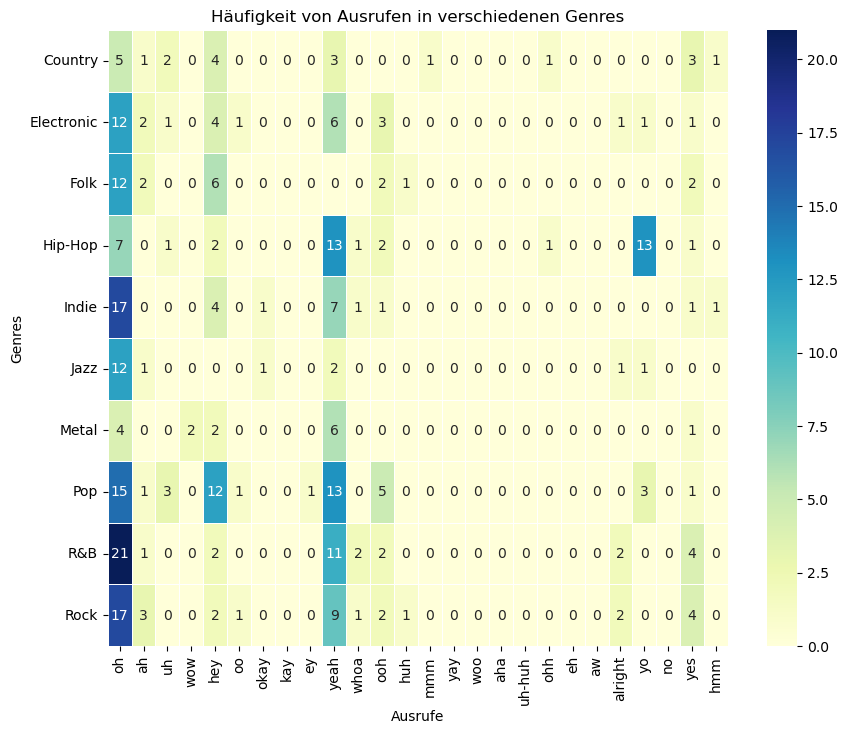

In [55]:
df_exclamations = pd.DataFrame.from_dict(exclamations_per_genre, orient='index').fillna(0)

# Optional: Überprüfe die ersten paar Zeilen des DataFrames

plt.figure(figsize=(10, 8))
sns.heatmap(df_exclamations, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)
plt.title('Häufigkeit von Ausrufen in verschiedenen Genres')
plt.xlabel('Ausrufe')
plt.ylabel('Genres')
plt.show()

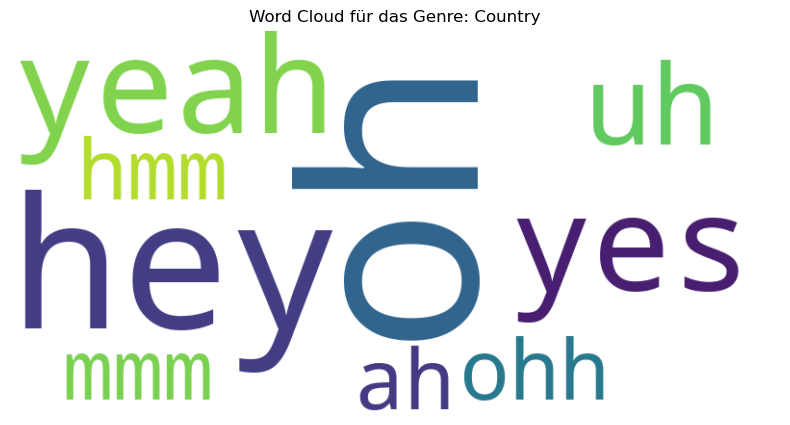

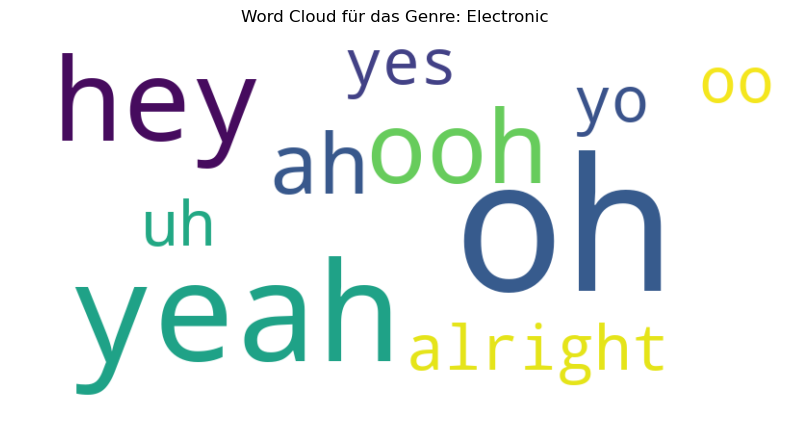

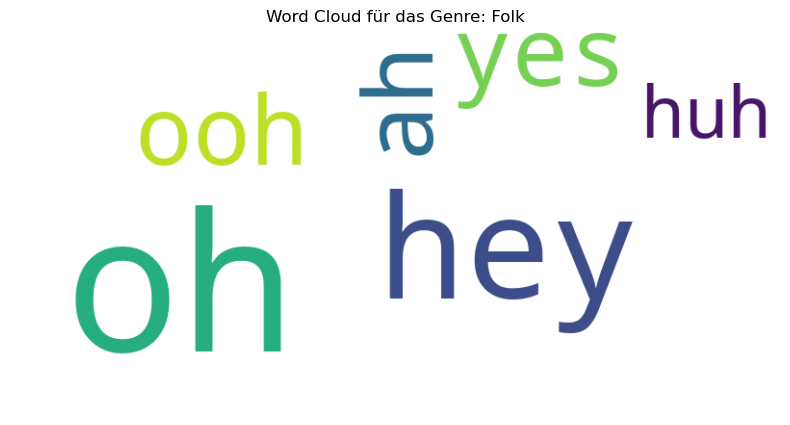

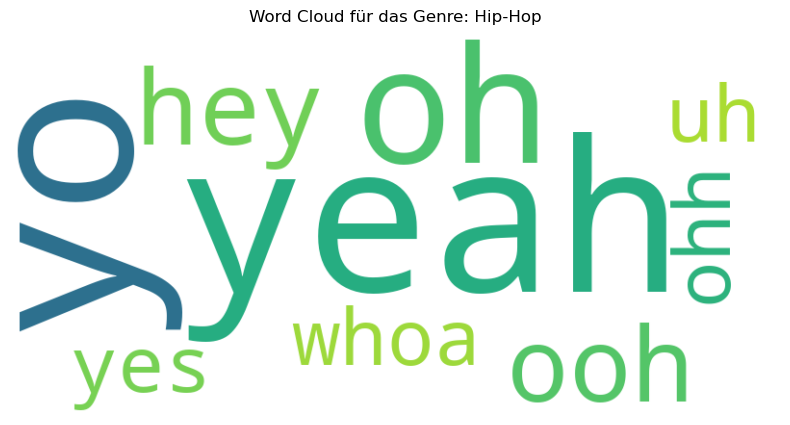

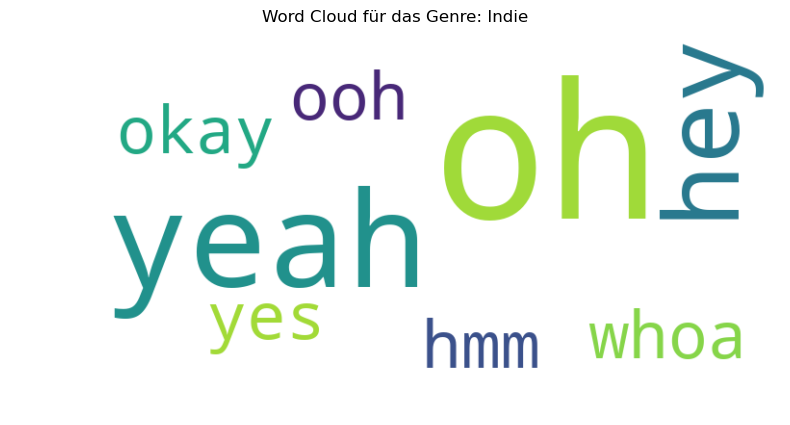

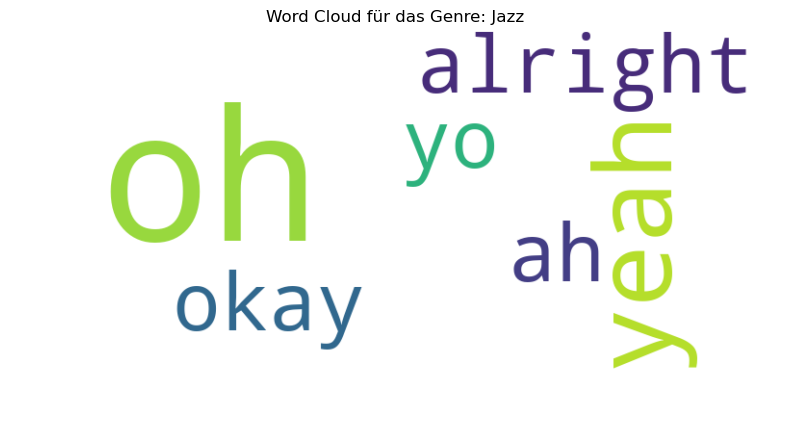

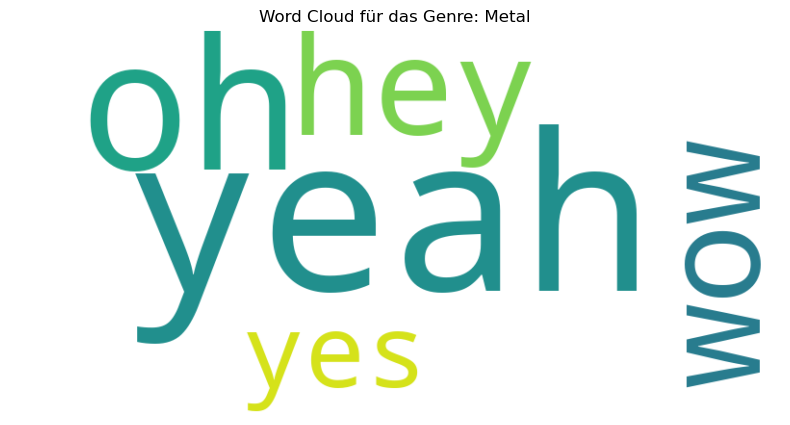

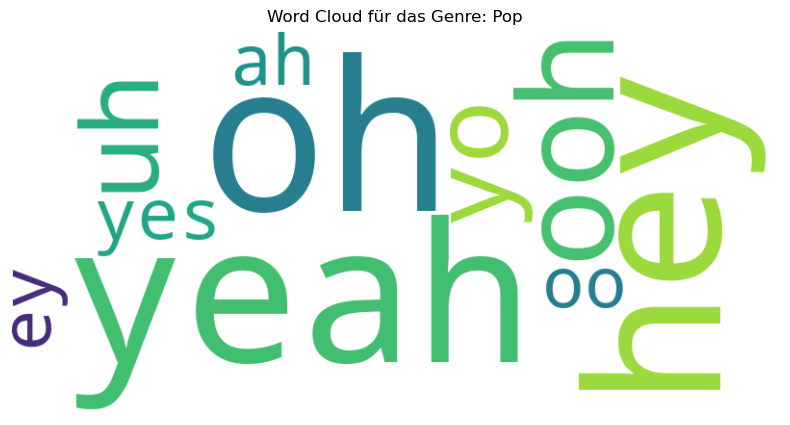

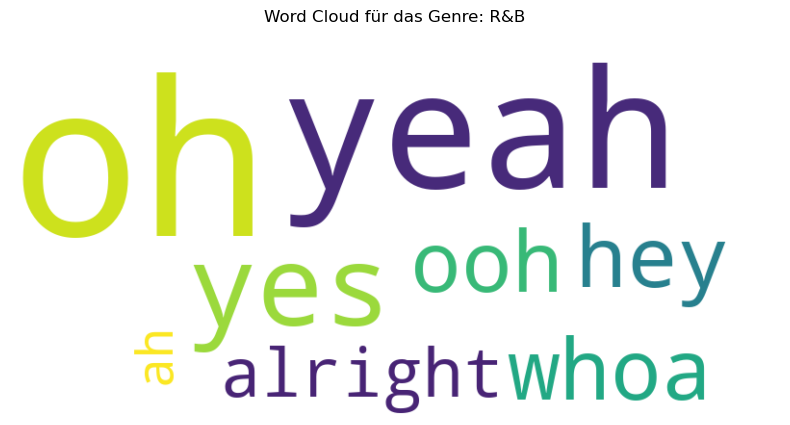

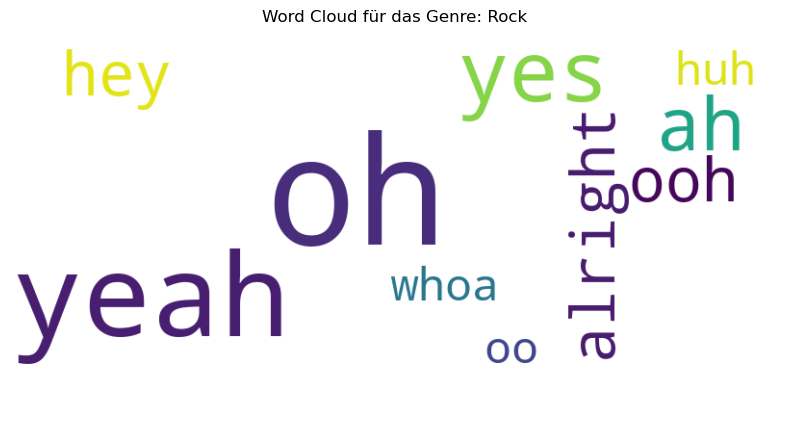

In [56]:
for genre, frequencies in exclamations_per_genre.items():
    # Konvertiere die Liste von Tupeln in ein Dictionary
    word_frequencies = dict(frequencies)
    
    # Überprüfe, ob word_frequencies leer ist
    if not word_frequencies:
        print(f"Keine Wörter verfügbar für das Genre: {genre}, überspringe...")
        continue  # Überspringe dieses Genre und fahre mit dem nächsten fort
    
    # Erstelle eine Word Cloud für das aktuelle Genre
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)
    
    # Visualisiere die Word Cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud für das Genre: {genre}")
    plt.show()